In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

In [7]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test


Variables: 

case number 

number of days between registration and the earlier of death, transplantation, or study analysis time in July, 1986 

status 

drug: 1= D-penicillamine, 2=placebo 

age in days 

sex: 0=male, 1=female 

presence of ascites: 0=no 1=yes 

presence of hepatomegaly 0=no 1=yes 

presence of spiders 0=no 1=yes 

presence of edema 0=no edema and no diuretic therapy for edema; 

.5 = edema present without diuretics, or edema resolved by diuretics; 

1 = edema despite diuretic therapy 

serum bilirubin in mg/dl 

serum cholesterol in mg/dl 

albumin in gm/dl 

urine copper in ug/day 

alkaline phosphatase in U/liter 

SGOT in U/ml 

triglicerides in mg/dl 

platelets per cubic ml / 1000 

prothrombin time in seconds 

histologic stage of disease 




In [8]:
pbc_df = pd.read_csv(os.getcwd()+'/Data/pbc_data_removed.csv')

In [9]:
pbc_df.shape

(293, 20)

In [10]:
pbc_df.head()

,case number,tenure,event,drug,age in days,sex,presence of ascites,presence of hepatomegaly,presence of spiders,presence of edema,serum bilirubin in mg/dl,serum cholesterol in mg/dl,albumin in gm/dl,urine copper in ug/day,alkaline phosphatase in U/liter,SGOT in U/ml,triglicerides in mg/dl,platelets per cubic ml / 1000,prothrombin time in seconds,histologic stage of disease
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,2503,2,2,24201,1,0,1,0,0.0,0.8,248,3.98,50,944.0,93.00,63,.,11.0,3


In [11]:
durations=pbc_df["tenure"]

In [12]:
event_observed = pbc_df["event"]

In [13]:
kmf = KaplanMeierFitter()

In [20]:
kmf.fit(durations,event_observed,label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 293 total observations, 168 right-censored observations>

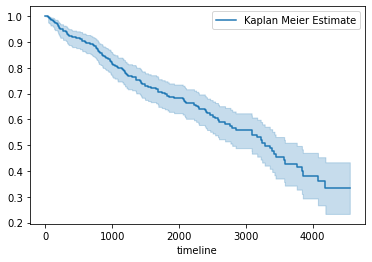

In [12]:
kmf.plot() #probability of  with time

In [22]:
#KM Curve 
#Show us the survival analysis after using the Medication[Liver Tx],
#The problem depicts the relation of the patient with respect to the time
#the Death rate of how many patient died 
#The Kaplan-Meier estimator is used to estimate the survival function. 
#The visual representation of this function is usually called the Kaplan-Meier curve, 
#and it shows what the probability of an event (for example, survival) is at a certain time interval.

In [23]:
pbc_df.columns

Index(['case number ', 'tenure', 'event', 'drug', 'age in days ', 'sex',
       'presence of ascites', 'presence of hepatomegaly',
       'presence of spiders', 'presence of edema ',
       'serum bilirubin in mg/dl ', 'serum cholesterol in mg/dl ',
       'albumin in gm/dl ', 'urine copper in ug/day ',
       'alkaline phosphatase in U/liter ', 'SGOT in U/ml ',
       'triglicerides in mg/dl ', 'platelets per cubic ml / 1000 ',
       'prothrombin time in seconds ', 'histologic stage of disease '],
      dtype='object')

drug: 1= D-penicillamine, 2=placebo

age in days

sex: 0=male, 1=female

presence of ascites: 0=no 1=yes

presence of hepatomegaly 0=no 1=yes

presence of spiders 0=no 1=yes

presence of edema 0=no edema and no diuretic therapy for edema; 

In [14]:
T = pbc_df['tenure']
E = pbc_df['event']

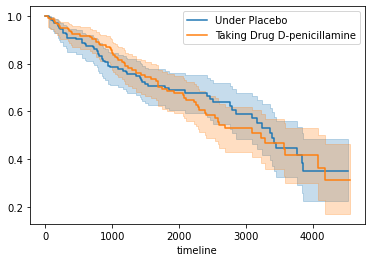

In [21]:
#drug: 1= D-penicillamine, 2=placebo

kmf1 = KaplanMeierFitter()
groups = pbc_df["drug"]
i1 = (groups == 2)
i2 = (groups == 1)
kmf1.fit(T[i1],E[i1],label="Under Placebo")
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = 'Taking Drug D-penicillamine')
kmf1.plot(ax=a1)
#With the severity of adverse effects and continued progression of  disease, 
#D-peniCillamine is not a clinically useful therapy in primary biliary cirrhosis. 
#ref link : https://aasldpubs.onlinelibrary.wiley.com/doi/pdf/10.1002/hep.1840050613
# We expected these curves to be different as this is a clinical trial to check the efficiency of the drug but it is not. 
# Supported by KM and link. Log rank test also shows that it is not significant.

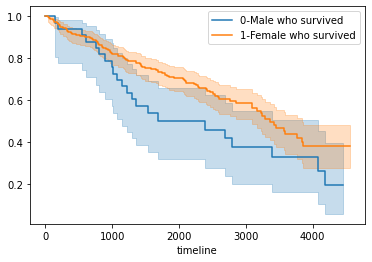

In [22]:
#sex: 0=male, 1=female

kmf1 = KaplanMeierFitter()
groups = pbc_df["sex"]
i1 = (groups == 0)
i2 = (groups == 1)
kmf1.fit(T[i1],E[i1],label="0-Male who survived")
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = '1-Female who survived')
kmf1.plot(ax=a1)
# Data is skewed , 260 females and 33 males which makes sense as this disease is more likely to occur in case of females.

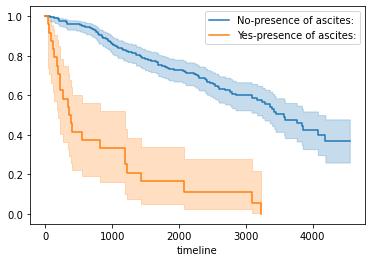

In [23]:
#presence of ascites: 0=no 1=yes
kmf1 = KaplanMeierFitter()
groups = pbc_df["presence of ascites"]
i1 = (groups == 0)
i2 = (groups == 1)
kmf1.fit(T[i1],E[i1],label="No-presence of ascites:")
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = 'Yes-presence of ascites:')
kmf1.plot(ax=a1)

#Ascites is the main complication of cirrhosis,3 and the mean time period to its development
#is approximately 10 years. Ascites is a landmark in the progression into the decompensated 
#phase of cirrhosis and is associated with a poor prognosis and quality of life; mortality 
#is estimated to be 50% in 2 years.

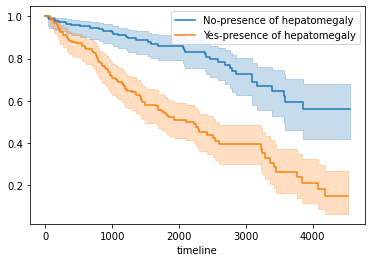

In [24]:
#presence of hepatomegaly 0=no 1=yes
kmf1 = KaplanMeierFitter()
groups = pbc_df["presence of hepatomegaly"]
i1 = (groups == 0)
i2 = (groups == 1)
kmf1.fit(T[i1],E[i1],label="No-presence of hepatomegaly")
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = 'Yes-presence of hepatomegaly')
kmf1.plot(ax=a1)
#Signs and symptoms of alcohol-related liver disease. 
#Most patients with alcohol-induced cirrhosis have hepatomegaly and/or splenomegaly. 
#Clinical presentation is similar to other forms of end-stage liver disease but may 
#be accompanied by concurrent alcoholic hepatitis.

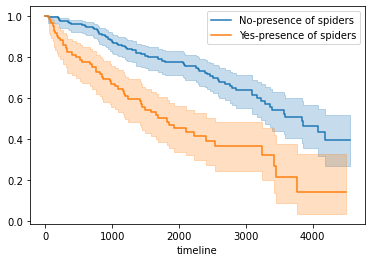

In [25]:
#presence of spiders 0=no 1=yes
kmf1 = KaplanMeierFitter()
groups = pbc_df["presence of spiders"]
i1 = (groups == 0)
i2 = (groups == 1)
kmf1.fit(T[i1],E[i1],label="No-presence of spiders")
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = 'Yes-presence of spiders')
kmf1.plot(ax=a1)
#Spider angioma is a common presentation of liver cirrhosis[1,2]. 
#It appears frequently in alcoholic cirrhotics or when liver function deteriorates[2-4] 
#and may be associated with esophageal variceal bleeding[5].
#However, the exact pathogenesis has been unclear.


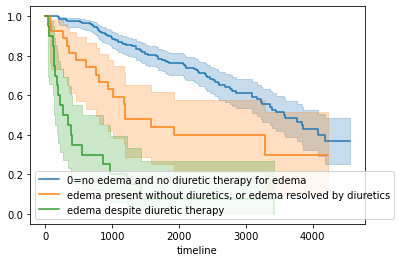

In [26]:
#presence of edema 0=no edema and no diuretic therapy for edema;
#.5 = edema present without diuretics, or edema resolved by diuretics;
#1 = edema despite diuretic therapy 
#Month-to-month One year  Two year
groups2 = pbc_df['presence of edema ']
j1 = (groups2 == 0)
j2 = (groups2 == 0.5)
j3 = (groups2 == 1)
kmf1.fit(T[j1],E[j1],label="0=no edema and no diuretic therapy for edema")
b1 = kmf1.plot()
kmf1.fit(T[j2],E[j2],label="edema present without diuretics, or edema resolved by diuretics")
b2=kmf1.plot(ax=b1)
kmf1.fit(T[j3],E[j3],label="edema despite diuretic therapy ")
b3=kmf1.plot(ax=b2)    





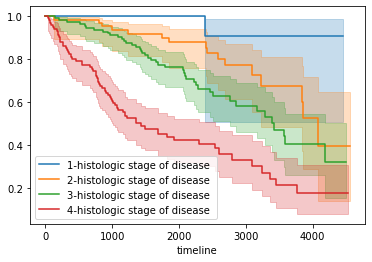

In [27]:
#histologic stage of disease 
groups2 = pbc_df['histologic stage of disease ']
j1 = (groups2 == 1)
j2 = (groups2 == 2)
j3 = (groups2 == 3)
j4 = (groups2 == 4)
 
kmf1.fit(T[j1],E[j1],label="1-histologic stage of disease ")
b1 = kmf1.plot()
kmf1.fit(T[j2],E[j2],label="2-histologic stage of disease ")
b2=kmf1.plot(ax=b1)
kmf1.fit(T[j3],E[j3],label="3-histologic stage of disease ")
b3=kmf1.plot(ax=b2) 
kmf1.fit(T[j4],E[j4],label="4-histologic stage of disease ")
b4=kmf1.plot(ax=b3)    






We describe here the logrank test, the most popular method of comparing the survival of groups, which takes the whole follow up period into account. It has the considerable advantage that it does not require us to know anything about the shape of the survival curve or the distribution of survival times.

The logrank test is used to test the null hypothesis that there is no difference between the populations in the probability of an event (here a death) at any time point. The analysis is based on the times of events (here deaths). For each such time we calculate the observed number of deaths in each group and the number expected if there were in reality no difference between the groups.

In [28]:
#logrank test:
#drug: 1= D-penicillamine, 2=placebo


groups = pbc_df["drug"]
i1 = (groups == 2)
i2 = (groups == 1)

#logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B =E[i2])
results.print_summary()

In [27]:
#sex: 0=male, 1=female


groups = pbc_df["sex"]
i1 = (groups == 0)

#logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B =E[i2])
results.print_summary()


In [26]:
#presence of ascites: 0=no 1=yes

groups = pbc_df["presence of ascites"]
i1 = (groups == 0)
i2 = (groups == 1)


#logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B =E[i2])
results.print_summary()
#Ascites is the main complication of cirrhosis,3 and the mean time period to its development
#is approximately 10 years. Ascites is a landmark in the progression into the decompensated 
#phase of cirrhosis and is associated with a poor prognosis and quality of life; mortality 
#is estimated to be 50% in 2 years.

In [25]:
#presence of hepatomegaly 0=no 1=yes

groups = pbc_df["presence of hepatomegaly"]
i1 = (groups == 0)
i2 = (groups == 1)

#logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B =E[i2])
results.print_summary()

#Signs and symptoms of alcohol-related liver disease. 
#Most patients with alcohol-induced cirrhosis have hepatomegaly and/or splenomegaly. 
#Clinical presentation is similar to other forms of end-stage liver disease but may 
#be accompanied by concurrent alcoholic hepatitis.

In [29]:
#presence of spiders 0=no 1=yes

groups = pbc_df["presence of spiders"]
i1 = (groups == 0)
i2 = (groups == 1)



#logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B =E[i2])
results.print_summary()

#It appears frequently in alcoholic cirrhotics or when liver function deteriorates[2-4] 
#and may be associated with esophageal variceal bleeding[5].
#However, the exact pathogenesis has been unclear.


In [30]:

groups2 = pbc_df['presence of edema ']
j1 = (groups2 == 0)
j2 = (groups2 == 0.5)
j3 = (groups2 == 1)

resultm = multivariate_logrank_test(durations, groups2,event_observed )
resultm.test_statistic
resultm.p_value
resultm.print_summary()


In [31]:
groups2 = pbc_df['histologic stage of disease ']
j1 = (groups2 == 1)
j2 = (groups2 == 2)
j3 = (groups2 == 3)
j4 = (groups2 == 4)


resultm = multivariate_logrank_test(durations, groups2,event_observed )
resultm.test_statistic
resultm.p_value
resultm.print_summary()
